In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
file_path = 'C:/Users/Jacob/Documents/datasets/amsterdamumcdb-1.0.2/'
save_path = 'C:/Users/Jacob/Documents/datasets/amsterdamumcdb-1.0.2-processed/'
if not os.path.exists(save_path):
    os.mkdir(save_path)

In [4]:
adm = pd.read_csv(os.path.join(save_path, 'admissions.csv'))
adm.head()

,Unnamed: 0,patientid,admissionid,admissioncount,location,urgency,origin,admittedat,admissionyeargroup,dischargedat,...,destination,gender,agegroup,dateofdeath,weightgroup,weightsource,heightgroup,heightsource,specialty,icudeath
0,4,4,4,1,IC&MC,0,Verpleegafdeling zelfde ziekenhuis,0,2010-2016,180900000,...,19,Man,70-79,NaN,70-79,Anamnestisch,170-179,Anamnestisch,Cardiochirurgie,False
1,5,5,5,1,IC,1,Eerste Hulp afdeling zelfde ziekenhuis,0,2010-2016,246420000,...,31,Man,50-59,NaN,60-69,Geschat,160-169,Gemeten,Longziekte,False
2,9,9,9,1,IC,0,NaN,0,2003-2009,242040000,...,15,Vrouw,70-79,NaN,70-79,NaN,159-,NaN,Cardiochirurgie,False
3,12,12,12,1,IC,0,NaN,0,2003-2009,627960000,...,29,Man,18-39,NaN,90-99,NaN,NaN,NaN,NaN,False
4,15,14,15,1,IC,1,Eerste Hulp afdeling zelfde ziekenhuis,0,2010-2016,893220000,...,Overleden,Man,60-69,812280000.0,60-69,Geschat,160-169,Geschat,Cardiologie,True


## Procedure order items data

In [5]:
pri = pd.read_csv(os.path.join(file_path, "processitems.csv"), encoding='latin-1')
print(pri.shape)
pri = pri.loc[pri["admissionid"].isin(adm["admissionid"])]
print(pri.shape)
pri.head()

(256715, 6)
(75782, 6)


,admissionid,itemid,item,start,stop,duration
44,4,9159,Arterielijn Radialis,6900000,166020000,2652
45,4,9166,Trilumen Jugularis,6900000,165240000,2639
46,4,9173,Swan Ganz Femoralis,6900000,38220000,522
47,4,9174,Swan Ganz Jugularis,39720000,68040000,472
48,4,9187,Pacemaker extern,6900000,180900000,2900


In [6]:
pri["admissionid"].nunique()

5237

In [7]:
# Top 30
pri = pri.loc[pri["item"].isin(pri["item"].value_counts().index.to_list()[:30])]
print(pri.shape)

(63074, 6)


In [8]:
pri = pri.loc[(0 < pri["start"]) & (pri["start"] < pri["stop"]) & (0 < pri["duration"])]
pri["start"] = pri["start"] / 1000 / 3600 / 24
pri["stop"] = pri["stop"] / 1000 / 3600 / 24
pri["duration"] = pri["duration"] / 60 / 24
print(pri.shape)

(62159, 6)


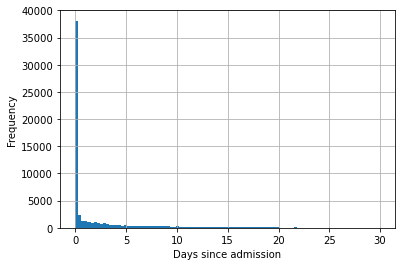

In [9]:
_ = pri["start"].hist(bins=100), plt.xlabel("Days since admission"), plt.ylabel("Frequency")

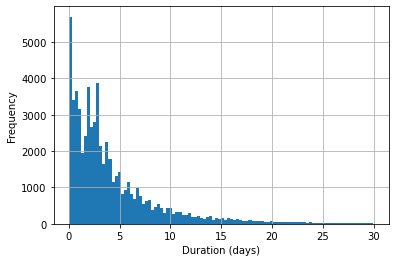

In [10]:
_ = pri["duration"].hist(bins=100), plt.xlabel("Duration (days)"), plt.ylabel("Frequency")

In [11]:
pri["item"].unique()

array(['Arterielijn Radialis', 'Trilumen Jugularis',
       'Swan Ganz Jugularis', 'Beademen', 'Wonddrain 1', 'Thoraxdrain 1',
       'Urine-Catheter (CAD)', 'Sonde', 'Perifeer infuus',
       'Pacemakerdraden', 'Sheet Swan Ganz', 'Tube', 'Fixatie (fixeren)',
       'Arterielijn Brachialis', 'Trilumen Femoralis',
       'Niet meer gebruiken Diepte Tube', 'Niet meer gebruiken Maat Tube',
       'Quad lumen Subclavia', 'Opwarmen (Actief uitwendig)',
       'Dieet - Gewoon eten', 'Arterielijn Femoralis',
       'Koelen patiënt (Actief)', 'Quad lumen Jugularis',
       'Beademen non-invasief', 'Trilumen Subclavia',
       'Dialyselijn Femoralis', 'CVVH', 'Streefwaarden drukken',
       'Tracheostoma', 'CPAP'], dtype=object)

In [12]:
pri.to_csv(os.path.join(save_path, "processitems.csv"))